# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 9</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 2 - Análise Exploratória em Conjunto de Dados do Kaggle

## Análise 4

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [2]:
# Dataset
clean_data_path = "dataset/autos.csv"
df = pd.read_csv(clean_data_path,encoding = "latin-1")

In [3]:
# Calcule a média de preço por marca e por veículo


,avgPrice,brand,vehicleType
0,897,volkswagen,Other
1,8014,volkswagen,coupe
2,13946,volkswagen,suv
3,1626,volkswagen,kleinwagen
4,3743,volkswagen,limousine


In [28]:
# dataframe_by_price_and_vehicle = df[['brand', 'vehicleType', 'price']].groupby(
#    by=['brand', 'vehicleType'],
#    as_index=False,
#    sort=False
# ).mean()
# dataframe_by_price_and_vehicle.head()

# making a new dataframe called trial
trial = pd.DataFrame()
# for eache line of unique brand
for brand in list(df["brand"].unique()):
    for vehicle_type in list(df["vehicleType"].unique()):
        price_mean = df[(df["brand"] == brand) & (df["vehicleType"] == vehicle_type)]["price"].mean()
        trial = trial.append(
            pd.DataFrame({
                'brand':brand , 
                'vehicleType':vehicle_type , 
                'avgPrice':price_mean
            }, 
                index=[0]
            )
        )
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

,brand,vehicleType,avgPrice
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743


## Preço médio de um veículo por marca, bem como tipo de veículo

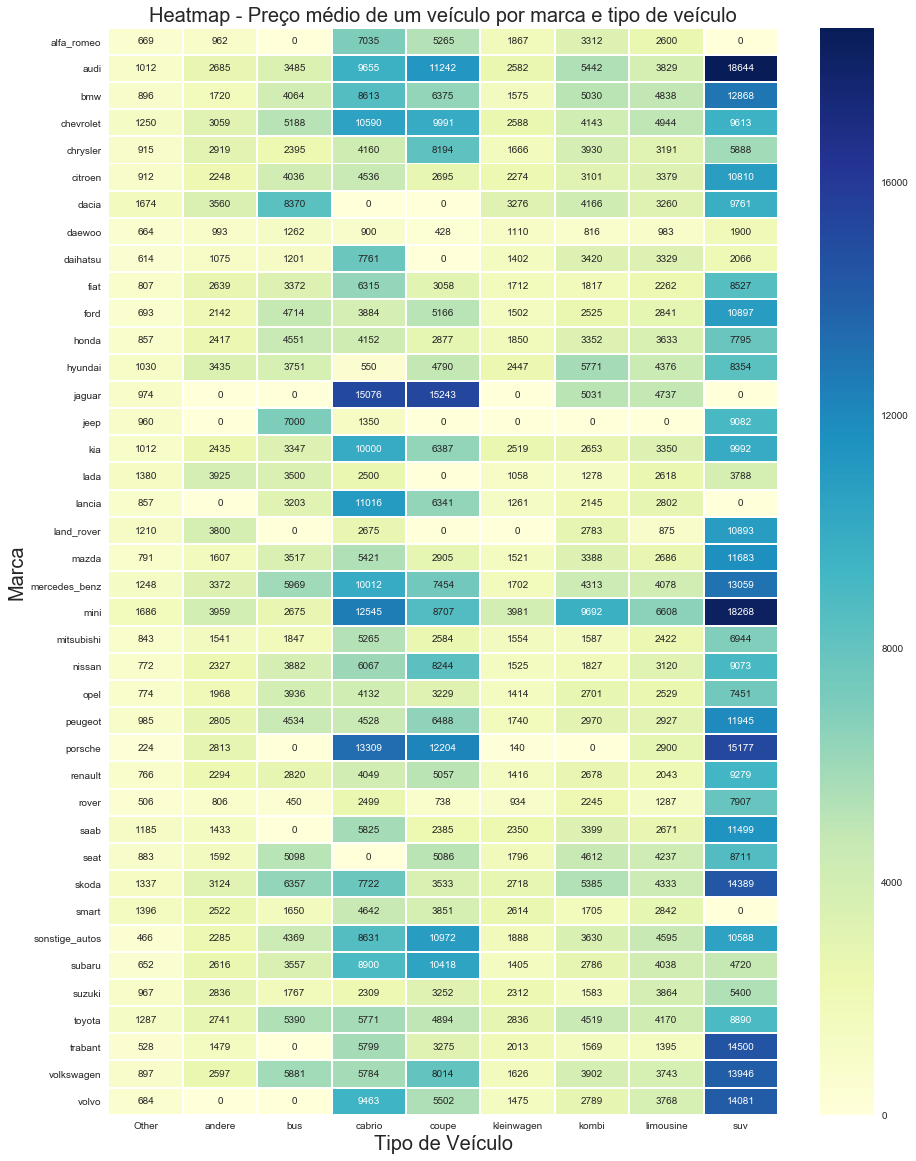

In [4]:
# Crie um Heatmap com Preço médio de um veículo por marca, bem como tipo de veículo


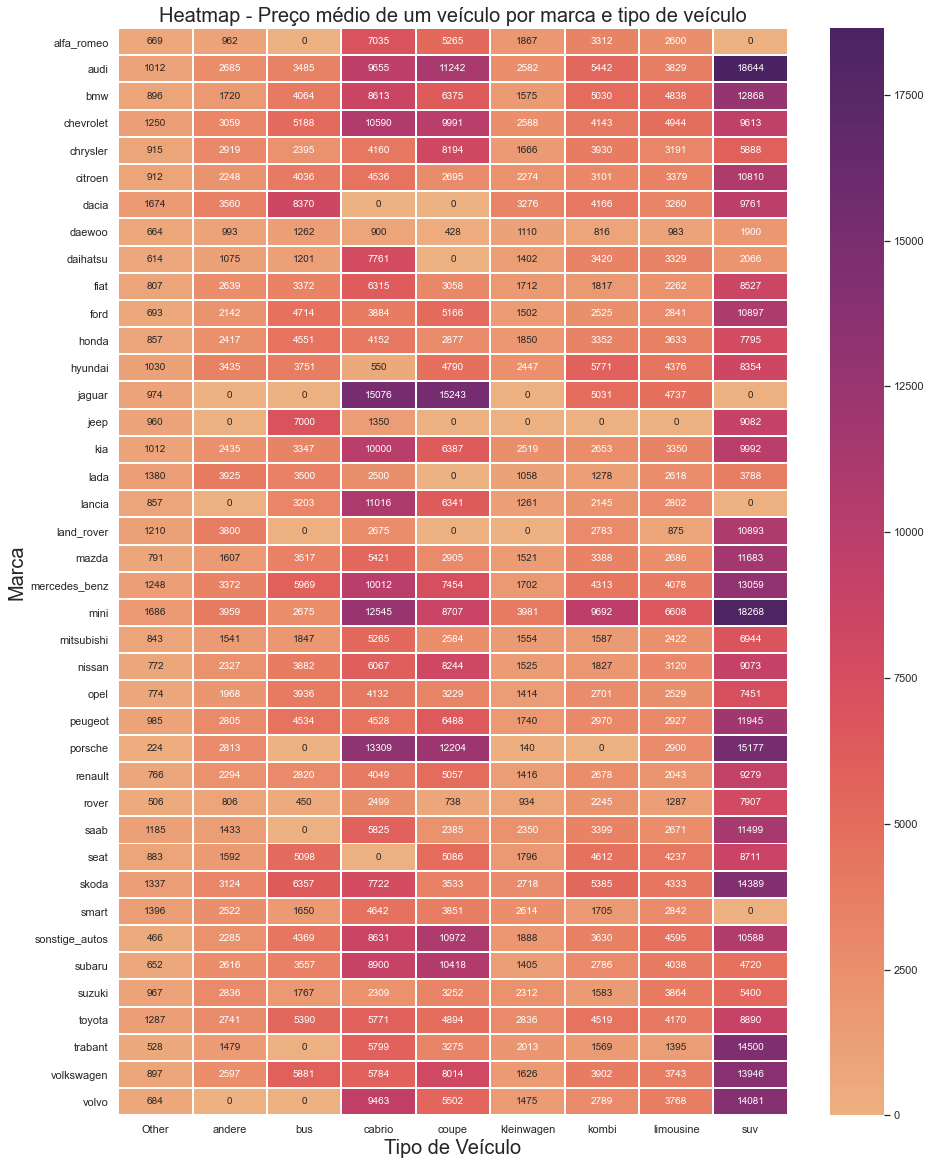

In [30]:
tri = trial.pivot("brand","vehicleType", "avgPrice")
fig, ax = plt.subplots(figsize=(15,20))
sns.heatmap(tri, linewidths=1, cmap="flare", annot=True, ax=ax, fmt="d")
ax.set_title("Heatmap - Preço médio de um veículo por marca e tipo de veículo",fontdict={'size':20})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':20})
ax.yaxis.set_label_text("Marca",fontdict= {'size':20})
plt.show()

In [5]:
# Salvando o plot
fig.savefig("plots/Analise4/heatmap-price-brand-vehicleType.png")

In [31]:
# Saving the plot
fig.savefig('plots/Analise4/heatmap-price-brand-vehicleType-2.png')

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>